In [11]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Loading Data
df = pd.read_csv(r'C:\Users\gcsum\OneDrive\Desktop\Superstore.csv', encoding='Windows-1252')


In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [25]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [27]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [29]:
print(df.duplicated().sum())

0


In [37]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [39]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [27]:
#Handle missing valyes
df.fillna({'Discount':0}, inplace = True)
df.dropna(inplace=True)
df.drop_duplicates(inplace = True)

In [37]:
#Converting the date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [45]:
#Creating new features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [53]:
#Exploring the sales data by Category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending = False)
print(sales_by_category)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


In [65]:
#Exploring the Sales data by Country 
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending = False)
print(sales_by_state)

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

In [63]:
#Exploring the sales data by year
sales_data_yearly = df.groupby('Year')['Sales'].sum().sort_values(ascending = False)
print(sales_data_yearly)

Year
2017    733215.2552
2016    609205.5980
2014    484247.4981
2015    470532.5090
Name: Sales, dtype: float64


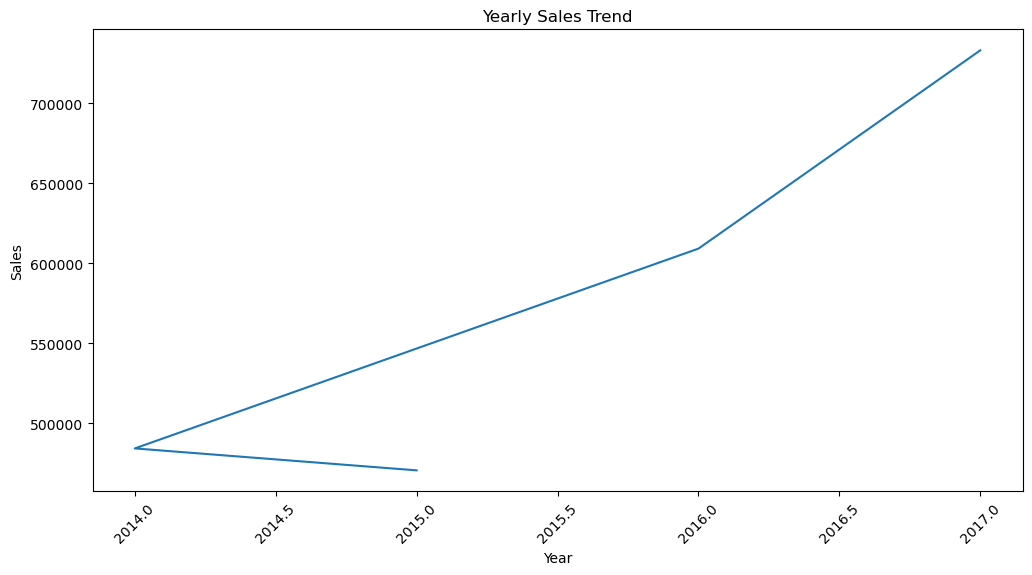

In [75]:
# Trend of sales over Time
sales_data_yearly.plot(figsize=(12,6), title = 'Yearly Sales Trend', xlabel='Year', ylabel='Sales')
plt.xticks(rotation = 45)
plt.show()

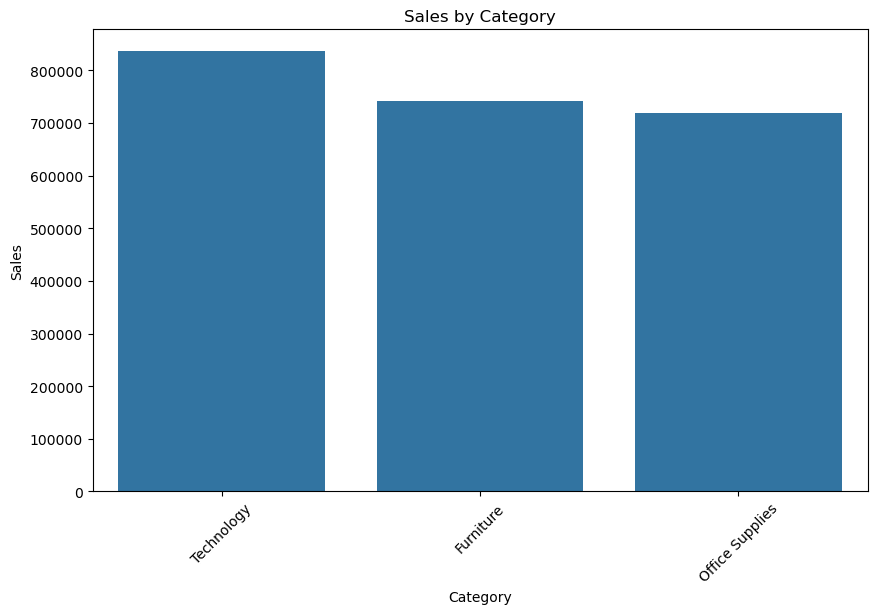

In [81]:
#Plotting sales by category in a bargraph
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Sales by Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

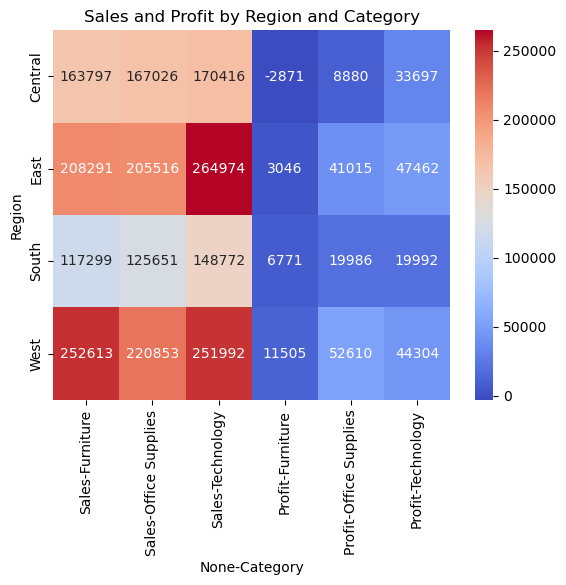

In [99]:
#Heat map of Sales and Profit by region
sales_region = df.groupby(['Region','Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).unstack()
sns.heatmap(sales_region, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Sales and Profit by Region and Category')
plt.show()

In [109]:
#Getting insights on products and sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending = False).head(10)
print("Top 10 Products by Sales:\n", top_products)

Top 10 Products by Sales:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [115]:
# Sales forecasting
#Getting the sales data at the end of every month
sales_monthly = df.resample('ME', on='Order Date')['Sales'].sum()

In [119]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [121]:
# Fit ARIMA model
model = ARIMA(sales_monthly, order=(1, 1, 1))
model_fit = model.fit()

In [131]:
#Forecasting the next 12 months
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=sales_monthly.index[-1] + pd.DateOffset(1), periods=12, freq='ME')


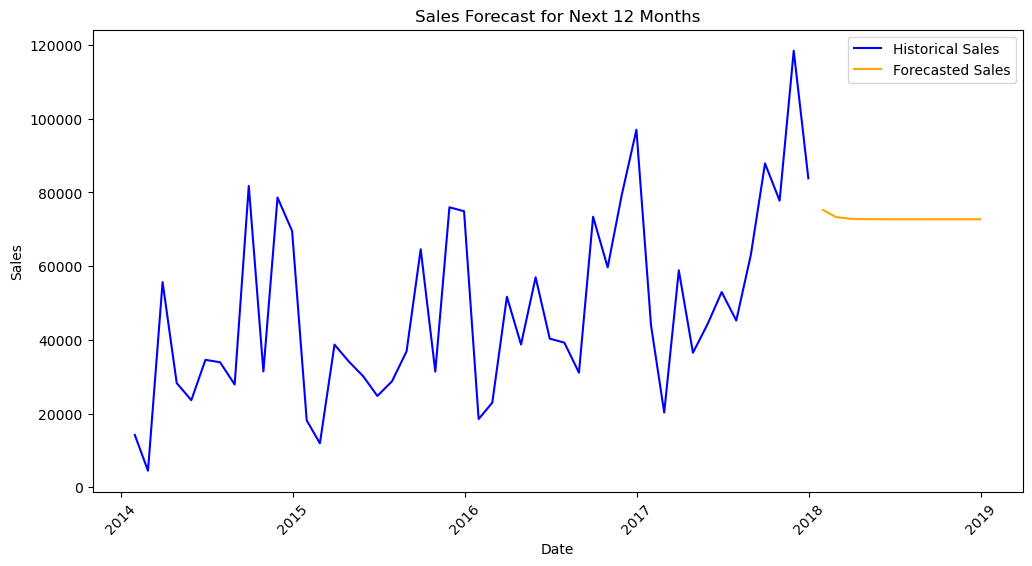

In [135]:
# 8. Plotting the Forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_monthly.index, sales_monthly, label='Historical Sales', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='orange')
plt.title('Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()